In [3]:
import rioxarray as rxr
import numpy as np
import rasterio
from rasterio.mask import mask
from pathlib import Path
import geopandas as gpd
import pprint
import re
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import xarray
import pandas as pd
import seaborn as sns


%matplotlib inline

In [22]:
src = xr.open_dataset('/home/goldma34/fire_insect_co-occurence/data/inputs/on_nc/nbr/ATI10_1987_819_nbr.nc', decode_coords=True)

src

<xarray.Dataset> Size: 980kB
Dimensions:  (lat: 97, lon: 97)
Coordinates:
  * lat      (lat) float64 776B 48.37 48.37 48.37 48.37 ... 48.4 48.4 48.4 48.4
  * lon      (lon) float64 776B -91.52 -91.52 -91.52 ... -91.49 -91.49 -91.49
Data variables: (12/14)
    crs      |S1 1B ...
    Band1    (lat, lon) float64 75kB ...
    Band2    (lat, lon) float64 75kB ...
    Band3    (lat, lon) float64 75kB ...
    Band4    (lat, lon) float64 75kB ...
    Band5    (lat, lon) float64 75kB ...
    ...       ...
    Band8    (lat, lon) float64 75kB ...
    Band9    (lat, lon) float64 75kB ...
    Band10   (lat, lon) float64 75kB ...
    Band11   (lat, lon) float64 75kB ...
    Band12   (lat, lon) float64 75kB ...
    Band13   (lat, lon) float64 75kB ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    history:             Sun Dec 15 16:58:25 2024: GDAL CreateCopy( /Volumes/...

## Crop rasters by their corresponding shapefile

### Define function to clip rasters

In [4]:

def getName(filename):
    """ takes in filepath and returns the name of the file for a tif 
    """
    name = re.sub(r'^.*/', "", filename)
    name = name.replace("_pp", "")
    name = name.replace("_nbr", "")
    name = name.replace("_bi", "")
    name = name.split(".")[-0]
    return name

def clipRasters(in_path, shpfile, out_path):
    pathlist = Path(in_path).rglob('*.nc')
    shp = gpd.read_file(shpfile)
    
    for path in pathlist:
        path_in_str = str(path)
        try:
            src = xr.open_dataset(path_in_str, decode_coords=True)
            name = getName(path_in_str)
            src.rio.write_crs("epsg:4326", inplace=True)
            print(f"Processing: {name}")
            
            src_lonlat = src.rio.reproject("epsg:4326")
            
            if not shp.isin([name]).any().any():
                print(f"Skipping: {name} (not found in shapefile)")
                continue
            
            shp_filtered = shp[shp.Fire_ID == name]
            clipped = src_lonlat.rio.clip(shp_filtered.geometry.values, shp_filtered.crs, drop=True, invert=False)
            
            out_dir = Path(out_path) / f"{name}.nc"
            vars_list = list(clipped.data_vars)
            for var in vars_list:
                del clipped[var].attrs['grid_mapping']
            
            clipped.to_netcdf(out_dir)
            print(f"Saved clipped raster to: {out_dir}")
        
        except Exception as e:
            print(f"Error processing {path_in_str}: {e}")


### Run clipping function



### defoliation history


Input file path

In [3]:
in_path = "/home/goldma34/fire_insect_co-occurence/data/inputs/qc_nc/nbr/"
shpfl = "/home/goldma34/fire_insect_co-occurence/data/inputs/qc/qc-fire-perims-shield-2.shp"
out_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/"

Clip rasters

In [4]:
clipRasters(in_path, shpfl, out_path)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x72147b7be0e0>>
Traceback (most recent call last):
  File "/home/goldma34/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Processing: QC_2481_2007
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_2481_2007.nc
Processing: QC_736_1999
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_736_1999.nc
Processing: QC_349_1993
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_349_1993.nc
Processing: QC_728_1996
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_728_1996.nc
Processing: QC_369_2007
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_369_2007.nc
Processing: QC_491_1988
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_491_1988.nc
Processing: QC_2717_2006
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_2717_200

: 

: 

#### check results

<xarray.Dataset> Size: 3MB
Dimensions:  (band: 1, x: 501, y: 217)
Coordinates:
  * band     (band) int64 8B 1
  * x        (x) float64 4kB -86.76 -86.76 -86.76 ... -86.63 -86.63 -86.63
  * y        (y) float64 2kB 50.66 50.66 50.66 50.66 ... 50.6 50.6 50.6 50.6
    crs      int64 8B 0
Data variables:
    Band1    (band, y, x) float32 435kB ...
    Band2    (band, y, x) float32 435kB ...
    Band3    (band, y, x) float32 435kB ...
    Band4    (band, y, x) float32 435kB ...
    Band5    (band, y, x) float32 435kB ...
    Band6    (band, y, x) float32 435kB ...
    Band7    (band, y, x) float32 435kB ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    GDAL_AREA_OR_POINT:  Area
    history:             Sun Dec 15 16:54:04 2024: GDAL CreateCopy( /Volumes/...

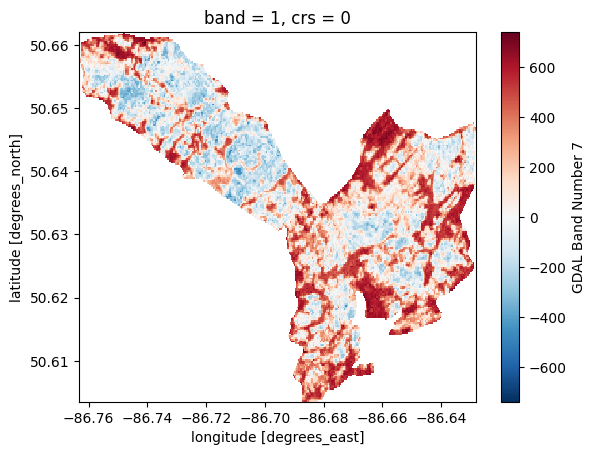

In [ ]:
t = rxr.open_rasterio("/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_clipped_rasters/burn_indices/NIP60_1996_227.nc", masked= True)
t['Band7'].squeeze().plot.imshow()
t

#### Trial code to extract and compare rbr and rbr with 180m offset


In [ ]:
band6 = t['Band6']
band7 = t['Band7']

# Calculate the average of all unmasked pixel values for band 6 and band 7
avg_band6 = round(band6.where(band6.notnull(), drop=True).mean().item(), 2)
avg_band7 = round(band7.where(band7.notnull(), drop=True).mean().item(), 2)

avg_band6, avg_band7

(480.35, 145.21)

### no history of defoliation

input file path

In [10]:
in_path = "/home/goldma34/fire_insect_co-occurence/data/inputs/on_nc/no_history/bi/"
shpfl = "/home/goldma34/fire_insect_co-occurence/data/inputs/on/fire/ON_FirePerimeters_85to2020_v00.shp"
out_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/"

clip rasters

In [11]:
clipRasters(in_path, shpfl, out_path)

Processing: RED46_1987_416
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/RED46_1987_416.nc
Processing: COC53_1996_544
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/COC53_1996_544.nc
Processing: FOR10_1991_317
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/FOR10_1991_317.nc
Processing: HEA12_2018_2042
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/HEA12_2018_2042.nc
Processing: RED69_2017_2092
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/RED69_2017_2092.nc
Processing: SIO12_1989_858
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/SIO12_1989_858.nc
Processing: KEN186_1988_1159
Saved clipped raster to: /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/

## Process to get RBR burn severity for each fire


Each image has an rbr and rbr offset band (6 and 7, respectively).
For each fire in a folder, extract the value for each band. 
Return values as two seperate columns in pandas dataframe
Also get name of fire using getName function defined earlier

### Define average function

In [12]:
def calculate_average(in_path, out_path):
    # Initialize an empty list to store the results
    results = []

    # Get the list of all .tif files in the directory
    pathlist = list(Path(in_path).rglob('*.nc'))
    print(f"Found {len(pathlist)} files in {in_path}")

    for path in pathlist:
        path_in_str = str(path)
        try:
            # Read the raster file using rioxarray
            raster = rxr.open_rasterio(path_in_str, masked=True)
            
            # get fire_id
            fire_id = getName(path_in_str)

            # Select band 6 and band 7
            band6 = raster['Band6']
            band7 = raster['Band7']

            # Calculate the average of all unmasked pixel values for band 6 and band 7
            avg_band6 = round(band6.where(band6.notnull(), drop=True).mean().item(), 2)
            avg_band7 = round(band7.where(band7.notnull(), drop=True).mean().item(), 2)

            print(fire_id, avg_band6, avg_band7)

            # Append the results to the list
            results.append({'Fire_ID': fire_id, 'rbr': avg_band6, 'rbr_w_offset': avg_band7})


        except Exception as e:
            print(f"Error processing {path_in_str}: {e}")

    # Convert the results list to a pandas DataFrame
    df = pd.DataFrame(results)
    print(f"Results DataFrame:\n{df}")

    out_dir = '/home/goldma34/fire_insect_co-occurence/data/outputs/' + out_path

    # Write the DataFrame to a CSV file
    df.to_csv(out_dir, index=False)
    print(f"Results saved to {out_dir}")

### Run average function

#### defoliated

In [ ]:
in_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/burn_indices/"
out_path = "qc/qc_burn_indices.csv"

calculate_average(in_path, out_path)

#### no defoliation history

In [13]:
in_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/"
out_path = "no_history/on_no_history_burn_indices.csv"

calculate_average(in_path, out_path)

Found 1253 files in /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/bi/
GER52_1989_202 543.14 350.8
GER45_1990_410 543.35 179.14
RED55_2018_2124 511.0 151.97
SLK50_1995_1131 490.99 293.45
SLK103_2011_1736 553.69 394.24
SLK41_1999_1071 561.95 304.51
RED20_1995_536 246.58 226.62
SLK75_1998_124 547.54 406.86
NIP45_2018_2132 516.73 184.83
SIO179_1988_934 500.73 253.01
GER18_1992_1094 501.34 301.43
SLK16_2013_1873 537.99 219.77
THU65_1996_453 518.72 146.72
SIO47_1990_1164 144.64 172.06
SLK57_2015_1997 582.4 383.98
NIP19_2000_22 500.05 216.94
SLK25_2020_2201 549.43 353.39
RED32_1989_746 522.96 222.11
GER30_1990_245 623.05 357.92
SLK25_2002_19 521.21 239.42
NIP24_2012_1838 481.43 219.71
NIP95_2017_2114 586.78 40.72
RED34_1989_1259 610.22 298.05
GER34_1989_1089 497.35 283.14
SLK31_2019_2184 469.2 280.91
SLK91_2012_1846 587.76 227.71
RED67_2018_2070 462.74 279.28
SLK17_1999_1207 556.6 180.15
GER30_1987_1116 596.41 331.35
RED176_2006_1632 516.12 209.24
NIP82_1996_776 518.

## Explore severity data


### Ontario

In [36]:
on_burn_indices = pd.read_csv('/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_burn_indices.csv')

on_burn_indices

,Fire_ID,rbr,rbr_w_offset
0,NIP60_1996_227,480.35,145.21
1,SLK61_2011_1819,584.76,105.50
2,KLK2_2001_10,522.88,518.76
3,TIM56_2005_1529,700.99,205.77
4,PEM2_2007_1588,634.63,607.53
...,...,...,...
356,KEN91_2011_1748,502.54,266.69
357,FOR42_1995_752,430.34,238.51
358,NIP428_2006_1646,584.81,233.37
359,NIP380_2006_1663,535.27,252.32


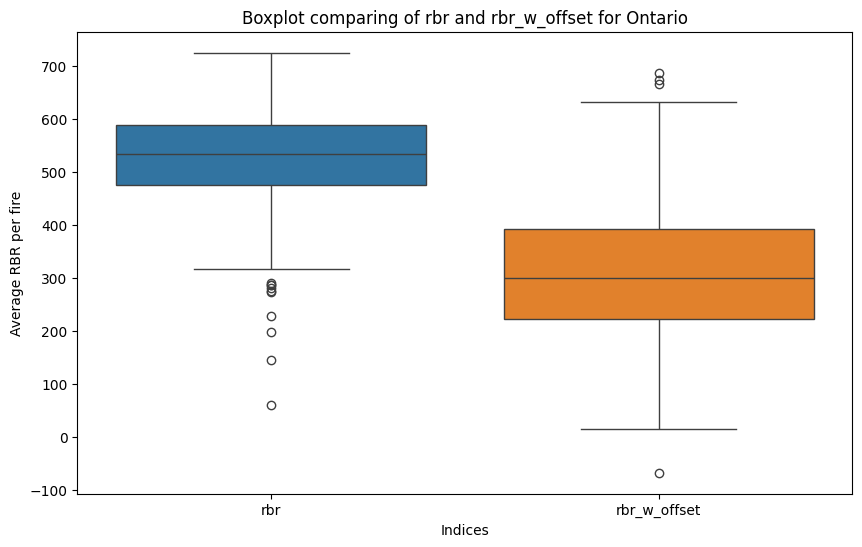

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=on_burn_indices[['rbr', 'rbr_w_offset']])
plt.title('Boxplot comparing of rbr and rbr_w_offset for Ontario')
plt.xlabel('Indices')
plt.ylabel('Average RBR per fire')
plt.show()

### Quebec

In [43]:
qc_burn_indices = pd.read_csv('/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_burn_indices.csv')

qc_burn_indices

,Fire_ID,rbr,rbr_w_offset
0,QC_466_1997,320.82,73.81
1,QC_1002_1995,416.76,142.61
2,QC_1103_1996,616.38,219.82
3,QC_480_2005,578.72,67.23
4,QC_455_1990,673.65,263.04
...,...,...,...
998,QC_6_1994,570.67,205.12
999,QC_303_2007,495.34,118.82
1000,QC_466_1990,598.48,163.93
1001,QC_917_1998,571.02,236.43


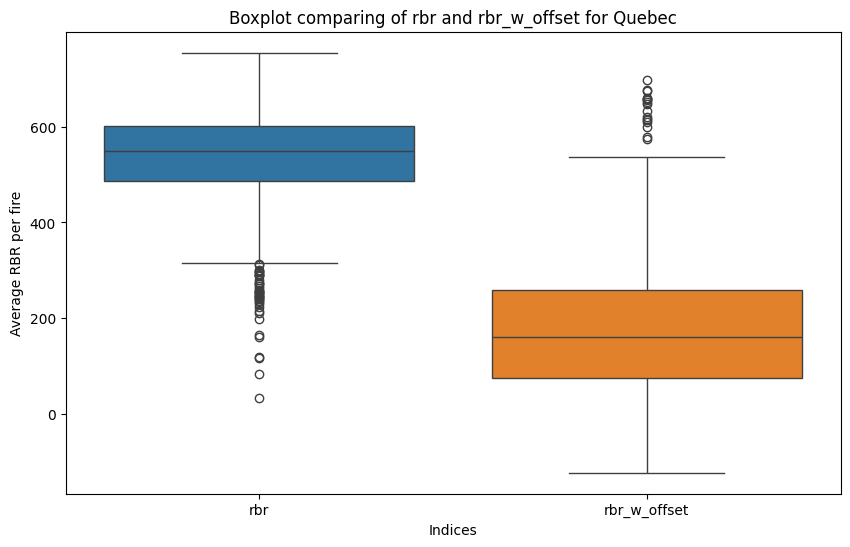

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=qc_burn_indices[['rbr', 'rbr_w_offset']])
plt.title('Boxplot comparing of rbr and rbr_w_offset for Quebec')
plt.xlabel('Indices')
plt.ylabel('Average RBR per fire')
plt.show()

#### visualize outliers for Quebec

total number of outliers: 59 
 outliers for rbr: 42 
 outliers for rbr_w_offset: 17


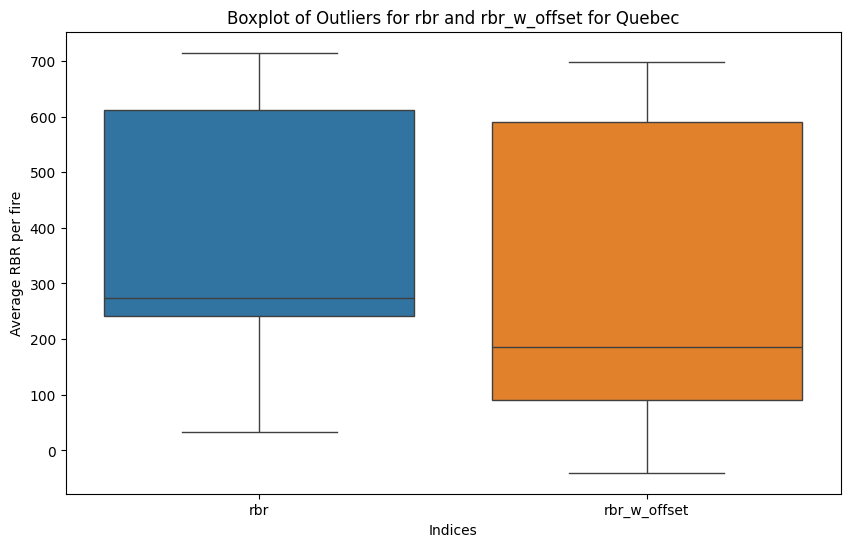

In [51]:

# Function to identify outliers
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for rbr and rbr_w_offset
outliers_rbr = identify_outliers(qc_burn_indices, 'rbr')
outliers_rbr_w_offset = identify_outliers(qc_burn_indices, 'rbr_w_offset')

# Combine the outliers into a single DataFrame
outliers = pd.concat([outliers_rbr, outliers_rbr_w_offset]).drop_duplicates()


print(f"total number of outliers: {len(outliers)} \n outliers for rbr: {len(outliers_rbr)} \n outliers for rbr_w_offset: {len(outliers_rbr_w_offset)}")

# Plot the outliers boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=outliers[['rbr', 'rbr_w_offset']])
plt.title('Boxplot of Outliers for rbr and rbr_w_offset for Quebec')
plt.xlabel('Indices')
plt.ylabel('Average RBR per fire')
plt.show()



## Recovery magnitude

In [5]:
example_nbr = rxr.open_rasterio('/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_clipped_rasters/nbr/NIP60_1996_227.nc', masked=True)
example_nbr

<xarray.Dataset> Size: 11MB
Dimensions:  (band: 1, x: 501, y: 217)
Coordinates:
  * band     (band) int64 8B 1
  * x        (x) float64 4kB -86.76 -86.76 -86.76 ... -86.63 -86.63 -86.63
  * y        (y) float64 2kB 50.66 50.66 50.66 50.66 ... 50.6 50.6 50.6 50.6
    crs      int64 8B 0
Data variables: (12/13)
    Band1    (band, y, x) float64 870kB ...
    Band10   (band, y, x) float64 870kB ...
    Band11   (band, y, x) float64 870kB ...
    Band12   (band, y, x) float64 870kB ...
    Band13   (band, y, x) float64 870kB ...
    Band2    (band, y, x) float64 870kB ...
    ...       ...
    Band4    (band, y, x) float64 870kB ...
    Band5    (band, y, x) float64 870kB ...
    Band6    (band, y, x) float64 870kB ...
    Band7    (band, y, x) float64 870kB ...
    Band8    (band, y, x) float64 870kB ...
    Band9    (band, y, x) float64 870kB ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    GDAL_AREA_OR_POINT:  Area
    history:             Sun Dec 15 17:02:28 2024: GDAL CreateCopy( /Volumes/...

In [6]:
# Define the band mapping and selected bands
band_mapping = {'Band1': 'preNBR', 'Band2': 'band1', 'Band3': 'post-fire NBR', 'Band13': '10_year'}
selected_bands = ['preNBR', 'band1', 'post-fire NBR', '10_year']

def rename_and_select_bands(raster, band_mapping, selected_bands):
    # Rename the bands based on their location
    raster = raster.rename_vars(band_mapping)
    
    raster = raster[selected_bands]
    
    return raster

t_1 = rename_and_select_bands(example_nbr, band_mapping, selected_bands)

t_1



<xarray.Dataset> Size: 3MB
Dimensions:        (band: 1, y: 217, x: 501)
Coordinates:
  * band           (band) int64 8B 1
  * x              (x) float64 4kB -86.76 -86.76 -86.76 ... -86.63 -86.63 -86.63
  * y              (y) float64 2kB 50.66 50.66 50.66 50.66 ... 50.6 50.6 50.6
    crs            int64 8B 0
Data variables:
    preNBR         (band, y, x) float64 870kB ...
    band1          (band, y, x) float64 870kB ...
    post-fire NBR  (band, y, x) float64 870kB ...
    10_year        (band, y, x) float64 870kB ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    GDAL_AREA_OR_POINT:  Area
    history:             Sun Dec 15 17:02:28 2024: GDAL CreateCopy( /Volumes/...

1275.025383233127 1182.3779111033732
-2129.730108504685 3306.206943745195


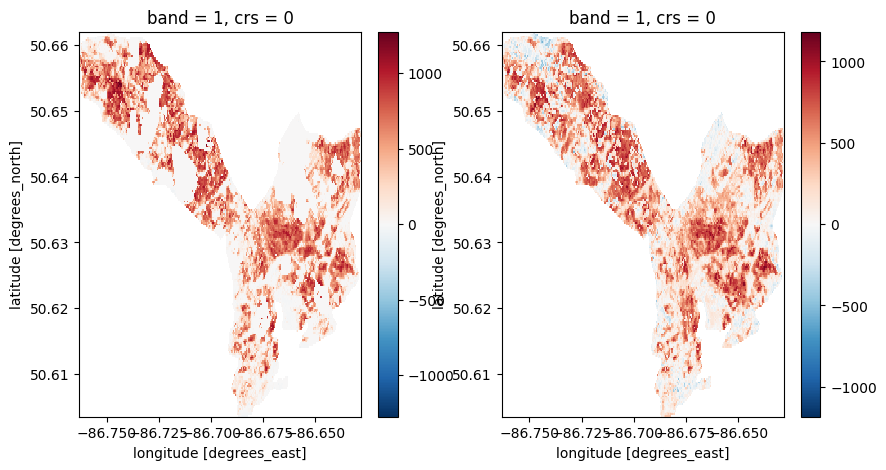

In [17]:
arr = t_1

preNBR = arr['preNBR']
yofNBR = arr['band1']
postNBR = arr['post-fire NBR']
tenYrNBR = arr['10_year']

#dvide the arrays by 10000
#preNBR = preNBR / 1000
#yofNBR = yofNBR / 1000
#postNBR = postNBR / 1000
#tenYrNBR = tenYrNBR / 1000


#calculate the difference between the preNBR and the year of fire NBR
diff_pre_yof = preNBR - yofNBR

#calculate the difference between the 10 year NBR and year of fire NBR
diff_ten_yof = tenYrNBR - yofNBR

# plot both differences
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
diff_pre_yof.squeeze().plot.imshow(ax=axs[0])
diff_ten_yof.squeeze().plot.imshow(ax=axs[1])

# get the maximum value in each difference array
diff_pre_yof_max = diff_pre_yof.max().item()
diff_ten_yof_max = diff_ten_yof.max().item()

# print the maximum values
print(diff_pre_yof_max, diff_ten_yof_max)

# divide the differences of ten year and year of fire NBR by difference of pre and year of fire NBR
ratio_diff = diff_ten_yof / diff_pre_yof

# print the minumum and maximum values of the ratio
# Replace inf and -inf with NaN
ratio_diff = xr.where(np.isinf(ratio_diff), np.nan, ratio_diff)

# Print the minimum and maximum values of the ratio, ignoring NaNs
ratio_diff_min = ratio_diff.min().item()
ratio_diff_max = ratio_diff.max().item()
print(ratio_diff_min, ratio_diff_max)





Look at subset/slice of arrays

(292.15292131061096, 298.5770773859113, 166.5334236275704, 369.24279421421517)

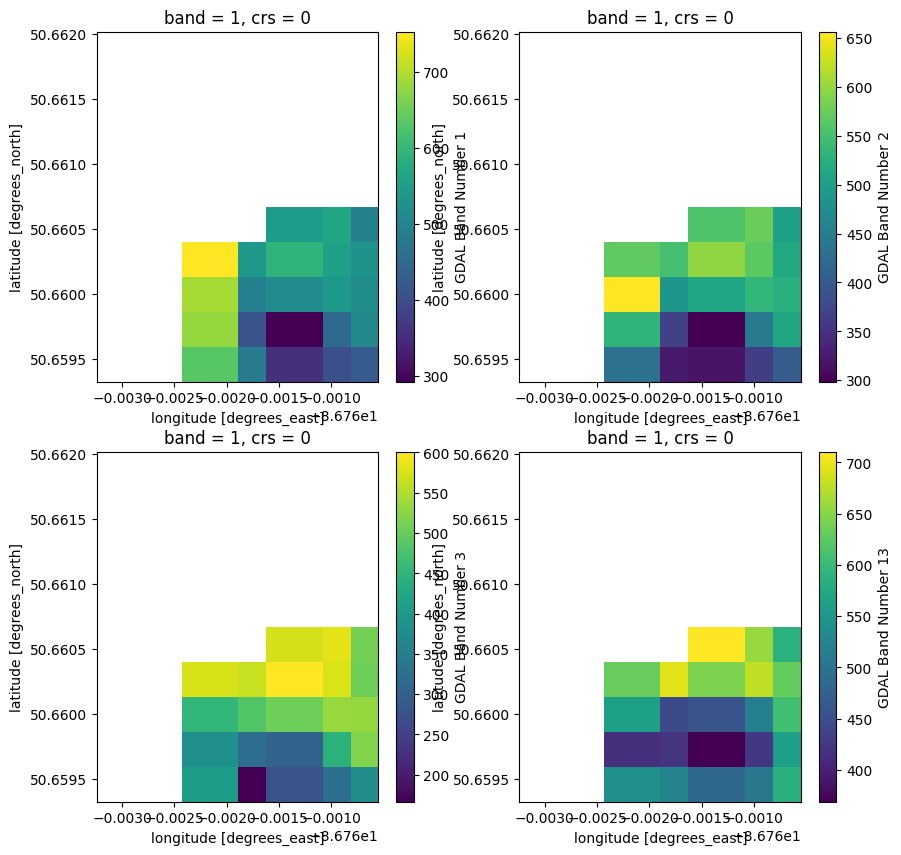

In [5]:

# slice the arrays
pre_sub = preNBR.isel(x=slice(0, 10), y=slice(0, 10))
yof_sub = yofNBR.isel(x=slice(0, 10), y=slice(0, 10))
post_sub = postNBR.isel(x=slice(0, 10), y=slice(0, 10))
tenYr_sub = tenYrNBR.isel(x=slice(0, 10), y=slice(0, 10))

# plot the arrays
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
pre_sub.squeeze().plot.imshow(ax=axs[0, 0])
yof_sub.squeeze().plot.imshow(ax=axs[0, 1])
post_sub.squeeze().plot.imshow(ax=axs[1, 0])
tenYr_sub.squeeze().plot.imshow(ax=axs[1, 1])

# get the lowest value in each array
pre_min = pre_sub.min().item()
yof_min = yof_sub.min().item()
post_min = post_sub.min().item()
tenYr_min = tenYr_sub.min().item()

# print the minimum values
pre_min, yof_min, post_min, tenYr_min

In [6]:
# turn the arrays into a dataframe and print as columns next to each other
df = pd.DataFrame({'preNBR': pre_sub.data.flatten(), 'yofNBR': yof_sub.data.flatten(), 'postNBR': post_sub.data.flatten(), 'tenYrNBR': tenYr_sub.data.flatten()})

#remove nan values
df = df.dropna()

# print the dataframe
df

,preNBR,yofNBR,postNBR,tenYrNBR
56,544.807369,558.612839,572.418308,710.473003
57,544.807369,558.612839,572.418308,710.473003
58,567.954634,575.487793,583.020953,658.352548
59,495.371877,503.011973,510.652069,587.053033
63,753.213368,569.186085,574.833056,631.302760
64,753.213368,569.186085,574.833056,631.302760
65,538.681645,551.733340,564.785035,695.301984
66,592.683588,596.868070,601.052552,642.897376
67,592.683588,596.868070,601.052552,642.897376
68,556.086660,566.225460,576.364261,677.752266


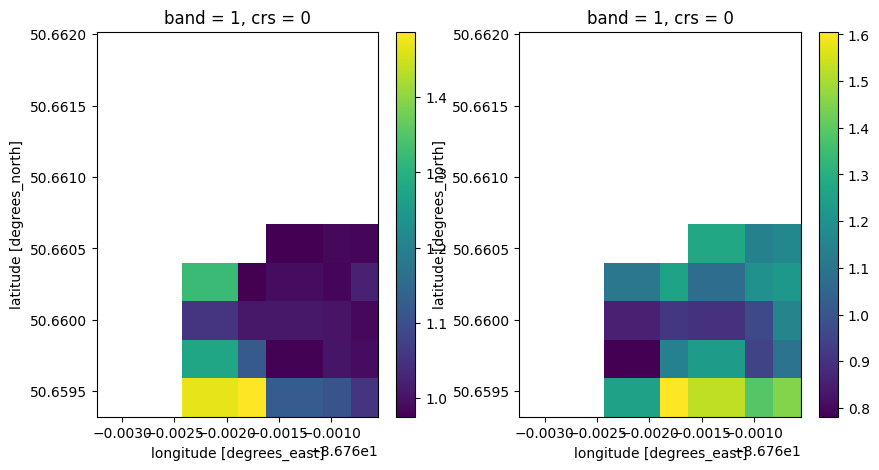

In [20]:
# calculate the magnitude decrease between the pre and year of fire NBR
diff_pre_yof_sub = abs(pre_sub / yof_sub) 

# calculate the difference between the 10 year NBR and year of fire NBR
diff_ten_yof_sub = abs(tenYr_sub / yof_sub) 

# plot both differences
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
diff_pre_yof_sub.squeeze().plot.imshow(ax=axs[0])
diff_ten_yof_sub.squeeze().plot.imshow(ax=axs[1])


In [21]:
# Name the DataArray before converting it to a DataFrame for both diff
diff_pre_yof_sub.name = 'diff_pre_yof_sub'
diff_ten_yof_sub.name = 'diff_ten_yof_sub'

# Print entire difference array as dataframe with all nans removed
diff_pre_yof_sub_df = diff_pre_yof_sub.to_dataframe().dropna()
diff_ten_yof_sub_df = diff_ten_yof_sub.to_dataframe().dropna()

#join the two diff dataframes by y and x columns with suffixes to handle overlapping columns
diff_df = diff_pre_yof_sub_df.join(diff_ten_yof_sub_df, how='inner', lsuffix='_pre', rsuffix='_ten')

# Print the joined DataFrame
diff_df




crs_pre  diff_pre_yof_sub  crs_ten  \
band y         x                                                
1    50.660535 -86.761491        0          0.975286        0   
               -86.761222        0          0.975286        0   
               -86.760952        0          0.986910        0   
               -86.760683        0          0.984811        0   
     50.660266 -86.762299        0          1.323317        0   
               -86.762030        0          1.323317        0   
               -86.761761        0          0.976344        0   
               -86.761491        0          0.992989        0   
               -86.761222        0          0.992989        0   
               -86.760952        0          0.982094        0   
               -86.760683        0          1.021939        0   
     50.659996 -86.762299        0          1.051672        0   
               -86.762030        0          1.051672        0   
               -86.761761        0          1.007672        0   
               -86.761491        0          1.009161        0   
               -86.761222        0          1.009161        0   
               -86.760952        0          1.003252        0   
               -86.760683        0          0.985757        0   
     50.659727 -86.762299        0          1.276121        0   
               -86.762030        0          1.276121        0   
               -86.761761        0          1.120478        0   
               -86.761491        0          0.978484        0   
               -86.761222        0          0.978484        0   
               -86.760952        0          1.004446        0   
               -86.760683        0          0.991461        0   
     50.659457 -86.762299        0          1.467778        0   
               -86.762030        0          1.467778        0   
               -86.761761        0          1.487070        0   
               -86.761491        0          1.125066        0   
               -86.761222        0          1.125066        0   
               -86.760952        0          1.108225        0   
               -86.760683        0          1.055075        0   

                           diff_ten_yof_sub  
band y         x                             
1    50.660535 -86.761491          1.271852  
               -86.761222          1.271852  
               -86.760952          1.143990  
               -86.760683          1.167076  
     50.660266 -86.762299          1.109132  
               -86.762030          1.109132  
               -86.761761          1.260214  
               -86.761491          1.077118  
               -86.761222          1.077118  
               -86.760952          1.196965  
               -86.760683          1.220197  
     50.659996 -86.762299          0.857687  
               -86.762030          0.857687  
               -86.761761          0.915605  
               -86.761491          0.899229  
               -86.761222          0.899229  
               -86.760952          0.964226  
               -86.760683          1.156675  
     50.659727 -86.762299          0.781469  
               -86.762030          0.781469  
               -86.761761          1.142912  
               -86.761491          1.236675  
               -86.761222          1.236675  
               -86.760952          0.951095  
               -86.760683          1.093931  
     50.659457 -86.762299          1.252346  
               -86.762030          1.252346  
               -86.761761          1.605859  
               -86.761491          1.528406  
               -86.761222          1.528406  
               -86.760952          1.387379  
               -86.760683          1.454323

crs_pre  diff_pre_yof_sub  crs_ten  \
band y         x                                                
1    50.660535 -86.761491        0          0.975286        0   
               -86.761222        0          0.975286        0   
               -86.760952        0          0.986910        0   
               -86.760683        0          0.984811        0   
     50.660266 -86.762299        0          1.323317        0   
               -86.762030        0          1.323317        0   
               -86.761761        0          0.976344        0   
               -86.761491        0          0.992989        0   
               -86.761222        0          0.992989        0   
               -86.760952        0          0.982094        0   
               -86.760683        0          1.021939        0   
     50.659996 -86.762299        0          1.051672        0   
               -86.762030        0          1.051672        0   
               -86.761761        0          1.007672        0   
               -86.761491        0          1.009161        0   
               -86.761222        0          1.009161        0   
               -86.760952        0          1.003252        0   
               -86.760683        0          0.985757        0   
     50.659727 -86.762299        0          1.276121        0   
               -86.762030        0          1.276121        0   
               -86.761761        0          1.120478        0   
               -86.761491        0          0.978484        0   
               -86.761222        0          0.978484        0   
               -86.760952        0          1.004446        0   
               -86.760683        0          0.991461        0   
     50.659457 -86.762299        0          1.467778        0   
               -86.762030        0          1.467778        0   
               -86.761761        0          1.487070        0   
               -86.761491        0          1.125066        0   
               -86.761222        0          1.125066        0   
               -86.760952        0          1.108225        0   
               -86.760683        0          1.055075        0   

                           diff_ten_yof_sub  crs  ratio_diff_sub  
band y         x                                                  
1    50.660535 -86.761491          1.271852    0        1.304081  
               -86.761222          1.271852    0        1.304081  
               -86.760952          1.143990    0        1.159164  
               -86.760683          1.167076    0        1.185075  
     50.660266 -86.762299          1.109132    0        0.838146  
               -86.762030          1.109132    0        0.838146  
               -86.761761          1.260214    0        1.290747  
               -86.761491          1.077118    0        1.084723  
               -86.761222          1.077118    0        1.084723  
               -86.760952          1.196965    0        1.218789  
               -86.760683          1.220197    0        1.194001  
     50.659996 -86.762299          0.857687    0        0.815546  
               -86.762030          0.857687    0        0.815546  
               -86.761761          0.915605    0        0.908634  
               -86.761491          0.899229    0        0.891066  
               -86.761222          0.899229    0        0.891066  
               -86.760952          0.964226    0        0.961100  
               -86.760683          1.156675    0        1.173387  
     50.659727 -86.762299          0.781469    0        0.612379  
               -86.762030          0.781469    0        0.612379  
               -86.761761          1.142912    0        1.020022  
               -86.761491          1.236675    0        1.263868  
               -86.761222          1.236675    0        1.263868  
               -86.760952          0.951095    0        0.946886  
               -86.760683          1.093931    0        1.103353  
     50

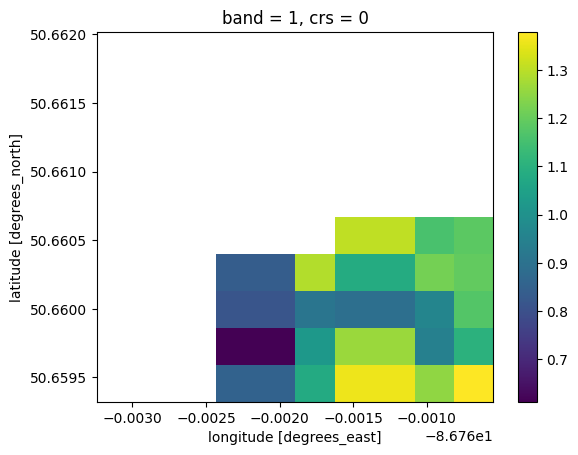

In [22]:
# divide the differences of ten year and year of fire NBR by difference of pre and year of fire NBR
ratio_diff_sub = diff_ten_yof_sub / diff_pre_yof_sub

#plot the ratio
ratio_diff_sub.squeeze().plot.imshow()

# Name the DataArray before converting it to a DataFrame
ratio_diff_sub.name = 'ratio_diff_sub'

# convert to data frame and add as another column to the diff_df
ratio_diff_sub_df = ratio_diff_sub.to_dataframe().dropna()
diff_df = diff_df.join(ratio_diff_sub_df)
diff_df

In [23]:
# in the diff_df multiply the ratio_diff_sub by 100 to get percentage and round to 2 decimal places and add as a new column
diff_df['percent_change'] = (diff_df['ratio_diff_sub'] * 100).round(2)
diff_df

crs_pre  diff_pre_yof_sub  crs_ten  \
band y         x                                                
1    50.660535 -86.761491        0          0.975286        0   
               -86.761222        0          0.975286        0   
               -86.760952        0          0.986910        0   
               -86.760683        0          0.984811        0   
     50.660266 -86.762299        0          1.323317        0   
               -86.762030        0          1.323317        0   
               -86.761761        0          0.976344        0   
               -86.761491        0          0.992989        0   
               -86.761222        0          0.992989        0   
               -86.760952        0          0.982094        0   
               -86.760683        0          1.021939        0   
     50.659996 -86.762299        0          1.051672        0   
               -86.762030        0          1.051672        0   
               -86.761761        0          1.007672        0   
               -86.761491        0          1.009161        0   
               -86.761222        0          1.009161        0   
               -86.760952        0          1.003252        0   
               -86.760683        0          0.985757        0   
     50.659727 -86.762299        0          1.276121        0   
               -86.762030        0          1.276121        0   
               -86.761761        0          1.120478        0   
               -86.761491        0          0.978484        0   
               -86.761222        0          0.978484        0   
               -86.760952        0          1.004446        0   
               -86.760683        0          0.991461        0   
     50.659457 -86.762299        0          1.467778        0   
               -86.762030        0          1.467778        0   
               -86.761761        0          1.487070        0   
               -86.761491        0          1.125066        0   
               -86.761222        0          1.125066        0   
               -86.760952        0          1.108225        0   
               -86.760683        0          1.055075        0   

                           diff_ten_yof_sub  crs  ratio_diff_sub  \
band y         x                                                   
1    50.660535 -86.761491          1.271852    0        1.304081   
               -86.761222          1.271852    0        1.304081   
               -86.760952          1.143990    0        1.159164   
               -86.760683          1.167076    0        1.185075   
     50.660266 -86.762299          1.109132    0        0.838146   
               -86.762030          1.109132    0        0.838146   
               -86.761761          1.260214    0        1.290747   
               -86.761491          1.077118    0        1.084723   
               -86.761222          1.077118    0        1.084723   
               -86.760952          1.196965    0        1.218789   
               -86.760683          1.220197    0        1.194001   
     50.659996 -86.762299          0.857687    0        0.815546   
               -86.762030          0.857687    0        0.815546   
               -86.761761          0.915605    0        0.908634   
               -86.761491          0.899229    0        0.891066   
               -86.761222          0.899229    0        0.891066   
               -86.760952          0.964226    0        0.961100   
               -86.760683          1.156675    0        1.173387   
     50.659727 -86.762299          0.781469    0        0.612379   
               -86.762030          0.781469    0        0.612379   
               -86.761761          1.142912    0        1.020022   
               -86.761491          1.236675    0        1.263868   
               -86.761222          1.236675    0        1.263868   
               -86.760952          0.951095    0        0.946886   
               -86.760683          1.093931    0

### Define function that rename bands that calculates recovery magnitude for each pixel in an image

Create new image as output

In [17]:
def rename_and_select_bands(raster, band_mapping, selected_bands):
    # Rename the bands based on their location
    raster = raster.rename_vars(band_mapping)
    
    # Select only the specified bands
    raster = raster[selected_bands]
    
    return raster

def calculate_per_pixel(in_path, out_path, decimal_places=2, max_value=1e6):
    # Initialize an empty list to store the results
    results = []

    # Get the list of all .nc files in the directory
    pathlist = list(Path(in_path).rglob('*.nc'))
    print(f"Found {len(pathlist)} files in {in_path}")

    for path in pathlist:
        path_in_str = str(path)
        try:
            # Read the raster file using rioxarray
            raster = rxr.open_rasterio(path_in_str)

            # Define the band mapping and selected bands
            band_mapping = {'Band1': 'preNBR', 'Band2': 'band1', 'Band3': 'post-fire NBR', 'Band13': '10_year'}
            selected_bands = ['preNBR', 'band1', 'post-fire NBR', '10_year']

            # Rename and select bands
            raster = rename_and_select_bands(raster, band_mapping, selected_bands)

            # get fire_id
            fire_id = getName(path_in_str)

            # Select the bands
            preNBR = raster['preNBR']
            yofNBR = raster['band1']
            post_fire_NBR = raster['post-fire NBR']
            ten_year = raster['10_year']

            # Calculate the distances per pixel
            distance_2 = abs(ten_year / post_fire_NBR) 
            distance_1 = abs(preNBR / post_fire_NBR) 

            # calculate recovery magnitude per pixel
            divided =  distance_2 / distance_1
            recovery_magnitude = (divided * 100).round(2)

             # Create a new dataset with the distances
            distances = xr.Dataset({
                'recovery_magnitude': recovery_magnitude
            })

            # Add CRS and transform information to the new dataset
            distances = distances.rio.write_crs(raster.rio.crs)
            distances.rio.write_transform(raster.rio.transform())

            # Save the distances dataset to a new NetCDF file
            out_file = Path(out_path) / f"{fire_id}_recovery_magnitude.nc"
            distances.to_netcdf(out_file, mode='w')
            print(f"Saved distances to {out_file}")

        except Exception as e:
            print(f"Error processing {path_in_str}: {e}")

    return distances

Test elementwise


In [47]:
example_nbr2 = rxr.open_rasterio('/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_clipped_rasters/nbr/SLK61_2011_1819.nc', masked=True)
# Define the band mapping and selected bands
band_mapping = {'Band1': 'preNBR', 'Band2': 'band1', 'Band3': 'post-fire NBR', 'Band13': '10_year'}
selected_bands = ['preNBR', 'band1', 'post-fire NBR', '10_year']

def rename_and_select_bands(raster, band_mapping, selected_bands):
    # Rename the bands based on their location
    raster = raster.rename_vars(band_mapping)
    
    raster = raster[selected_bands]
    
    return raster

t_2 = rename_and_select_bands(example_nbr2, band_mapping, selected_bands)

t_2



<xarray.Dataset> Size: 9MB
Dimensions:        (band: 1, y: 384, x: 759)
Coordinates:
  * band           (band) int64 8B 1
  * x              (x) float64 6kB -92.46 -92.46 -92.46 ... -92.25 -92.25 -92.25
  * y              (y) float64 3kB 51.58 51.58 51.58 51.58 ... 51.48 51.48 51.48
    crs            int64 8B 0
Data variables:
    preNBR         (band, y, x) float64 2MB ...
    band1          (band, y, x) float64 2MB ...
    post-fire NBR  (band, y, x) float64 2MB ...
    10_year        (band, y, x) float64 2MB ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    GDAL_AREA_OR_POINT:  Area
    history:             Sun Dec 15 17:03:33 2024: GDAL CreateCopy( /Volumes/...

In [14]:
def calculate_average_recovery(raster):
    # Calculate the average recovery magnitude across all pixels
    avg_preNBR = round(raster['preNBR'].mean().item(),2)
    avg_postNBR = round(raster['post-fire NBR'].mean().item(),2)
    avg_10yrNBR = round(raster['10_year'].mean().item(),2)

    # Calculate the distances per pixel
    distance_2 = abs(avg_10yrNBR / avg_postNBR) 
    distance_1 = abs(avg_preNBR / avg_postNBR) 

    # calculate recovery magnitude per pixel
    divided =  distance_2 / distance_1
    avg_recovery = round((divided * 100), 2)
    
    
    return avg_recovery

In [48]:
test_result = calculate_average_recovery(t_2)

test_result

74.72

In [18]:
def average_recovery_per_fire(in_path, out_path, filename):
    # Initialize an empty list to store the results
    results = []

    # Get the list of all .nc files in the directory
    pathlist = list(Path(in_path).rglob('*.nc'))
    print(f"Found {len(pathlist)} files in {in_path}")

    for path in pathlist:
        path_in_str = str(path)
        try:
            # Read the raster file using rioxarray
            raster = rxr.open_rasterio(path_in_str, masked=True)

            # Define the band mapping and selected bands
            band_mapping = {'Band1': 'preNBR', 'Band2': 'band1', 'Band3': 'post-fire NBR', 'Band13': '10_year'}
            selected_bands = ['preNBR', 'band1', 'post-fire NBR', '10_year']

            # Rename and select bands
            raster = rename_and_select_bands(raster, band_mapping, selected_bands)

            # get fire_id
            fire_id = getName(path_in_str)

            # calculate abverage recovery 
            avg_recovery = calculate_average_recovery(raster)

            print(f"fire {fire_id} has an average recovery of {avg_recovery}")

            # make df
            df = pd.DataFrame({
                'Fire_ID': [fire_id],
                'Average Recovery': [avg_recovery]
            })

            # append results to the list
            results.append(df)

        except Exception as e:
            print(f"Error processing {path_in_str}: {e}")
    
    # concatenate the results list into a single DataFrame
    combined_df = pd.concat(results, ignore_index=True)


    # Save the resulting dataset 
    out_file = Path(out_path) / filename
    combined_df.to_csv(out_file)
    print(f"Saved distances to {out_file}")

        

    return combined_df

#### defoliation history

In [ ]:
# Ontario usage
in_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_clipped_rasters/nbr/"
out_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/on/on_recovery_magnitude/"
filename = "on_recovery_magnitude.csv"
distances = average_recovery_per_fire(in_path, out_path, filename)

In [ ]:
# Quebec usage
in_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/"
out_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_recovery_magnitude/"
filename = "qc_recovery_magnitude.csv"
distances = average_recovery_per_fire(in_path, out_path, filename)

#### no defoliation history

In [19]:
# Ontario usage
in_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/nbr/"
out_path = "/home/goldma34/fire_insect_co-occurence/data/outputs/no_history/"
filename = "on_no_history_recovery_magnitude.csv"
distances = average_recovery_per_fire(in_path, out_path, filename)

Found 1257 files in /home/goldma34/fire_insect_co-occurence/data/outputs/no_history/clipped/nbr/
fire GER52_1989_202 has an average recovery of 78.44
fire GER45_1990_410 has an average recovery of 80.83
fire RED55_2018_2124 has an average recovery of 54.06
fire SLK50_1995_1131 has an average recovery of 82.11
fire SLK103_2011_1736 has an average recovery of 89.13
fire SLK41_1999_1071 has an average recovery of 75.34
fire RED20_1995_536 has an average recovery of 182.29
fire SLK75_1998_124 has an average recovery of 87.75
fire NIP45_2018_2132 has an average recovery of 77.83
fire SIO179_1988_934 has an average recovery of 76.37
fire GER18_1992_1094 has an average recovery of 84.72
fire SLK16_2013_1873 has an average recovery of 78.11
fire THU65_1996_453 has an average recovery of 74.31
fire SIO47_1990_1164 has an average recovery of 298.26
fire SLK57_2015_1997 has an average recovery of 90.63
fire NIP19_2000_22 has an average recovery of 61.06
fire SLK25_2020_2201 has an average recover

In [ ]:
distances.head()

Check results

In [65]:
check = rxr.open_rasterio("/home/goldma34/fire_insect_co-occurence/data/outputs/qc/qc_clipped_rasters/nbr/QC_53_1988.nc", masked=True)
check



<xarray.Dataset> Size: 6MB
Dimensions:  (band: 1, x: 221, y: 259)
Coordinates:
  * band     (band) int64 8B 1
  * x        (x) float64 2kB -73.62 -73.62 -73.62 ... -73.57 -73.57 -73.57
  * y        (y) float64 2kB 49.59 49.59 49.59 49.59 ... 49.52 49.52 49.52 49.52
    crs      int64 8B 0
Data variables: (12/13)
    Band1    (band, y, x) float64 458kB ...
    Band10   (band, y, x) float64 458kB ...
    Band11   (band, y, x) float64 458kB ...
    Band12   (band, y, x) float64 458kB ...
    Band13   (band, y, x) float64 458kB ...
    Band2    (band, y, x) float64 458kB ...
    ...       ...
    Band4    (band, y, x) float64 458kB ...
    Band5    (band, y, x) float64 458kB ...
    Band6    (band, y, x) float64 458kB ...
    Band7    (band, y, x) float64 458kB ...
    Band8    (band, y, x) float64 458kB ...
    Band9    (band, y, x) float64 458kB ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.10.0, released 2024/11/01
    GDAL_AREA_OR_POINT:  Area
    history:             Sun Dec 15 17:35:33 2024: GDAL CreateCopy( /Volumes/...

In [25]:
# Extract the data values
data_values = check.values

# Check for NaN values
nan_count = np.isnan(data_values).sum()
total_count = data_values.size
nan_percentage = (nan_count / total_count) * 100

print(f"Total number of values: {total_count}")
print(f"Number of NaN values: {nan_count}")
print(f"Percentage of NaN values: {nan_percentage:.2f}%")

Total number of values: 224960
Number of NaN values: 0
Percentage of NaN values: 0.00%
